In [153]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [154]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


In [155]:
rows = len(df)
NA_hurricanes = len(df[df.BASIN=='NA'])
NA_hurricanes_unique = len(df[df.BASIN=='NA'].SID.unique()) 
print(f'There are {rows} rows in this dataset.')
print(f'There are {NA_hurricanes_unique} unique North Atlantic hurricanes, and total {NA_hurricanes} North Atlantic hurricanes in this dataset.')

There are 716354 rows in this dataset.
There are 2345 unique North Atlantic hurricanes, and total 126593 North Atlantic hurricanes in this dataset.


# 1) Get the unique values of the BASIN, SUBBASIN, and NATURE columns

In [156]:
unique_basin = df['BASIN'].unique()
unique_subbasin = df['SUBBASIN'].unique()
unique_nature = df['NATURE'].unique()
print("Unique BASIN values:", unique_basin)
print("Unique SUBBASIN values:", unique_subbasin)
print("Unique NATURE values:", unique_nature)

Unique BASIN values: ['NI' 'SI' 'NA' 'EP' 'WP' 'SP' 'SA']
Unique SUBBASIN values: ['BB' 'AS' 'MM' 'GM' 'NA' 'CS' 'WA' 'EA' 'CP']
Unique NATURE values: ['NR' 'TS' 'ET' 'SS' 'MX' 'DS']


# 2) Rename the WMO_WIND and WMO_PRES columns to WIND and PRES

In [157]:
df.rename(columns={'WMO_WIND': 'WIND', 'WMO_PRES': 'PRES'}, inplace=True)
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


# 3) Get the 10 largest rows in the dataset by WIND

In [158]:
top_10_wind = df.nlargest(10, 'WIND')
top_10_wind

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


# 4) Group the data on SID and get the 10 largest hurricanes by WIND

In [159]:
top_10_wind_sid = df.groupby('SID').max().nlargest(10,'WIND')
top_10_wind_sid

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0000,185.0,1007.0
1980214N11330,1980,57,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0000,165.0,1010.0
1935241N23291,1935,46,NA,NA,NaN,1935-09-10 12:00:00,TS,57.0,-31.1196,160.0,996.0
1988253N12306,1988,74,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0000,160.0,1008.0
1997253N12255,1997,81,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7000,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0000,160.0,1004.0
2019236N10314,2019,52,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4000,160.0,1011.0
1998295N12284,1998,89,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0000,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9000,155.0,1009.0


# 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

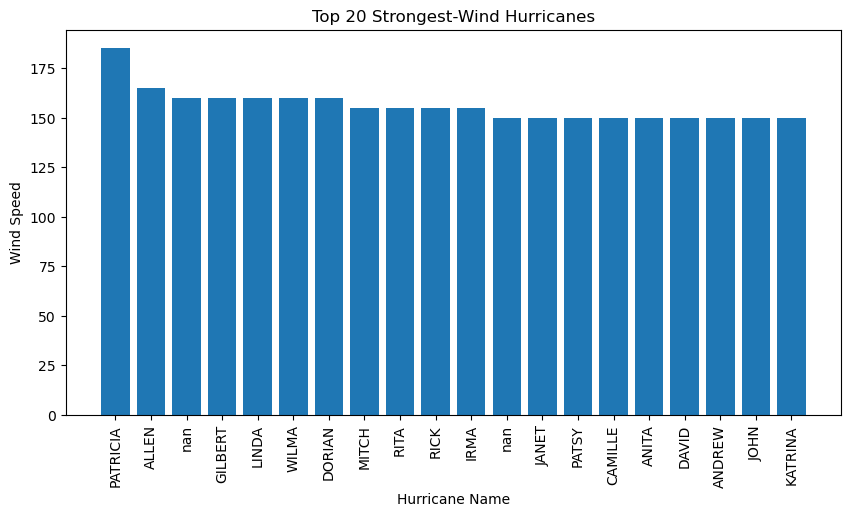

In [160]:
top_20_wind_sid = df.groupby('SID').max().nlargest(n=20, columns='WIND')
name_labels = top_20_wind_sid['NAME'].values

plt.figure(figsize=(10, 5))
plt.bar(top_20_wind_sid.index, top_20_wind_sid.WIND)
plt.title('Top 20 Strongest-Wind Hurricanes')
plt.xlabel('Hurricane Name')
plt.ylabel('Wind Speed')
plt.xticks(ticks=range(len(top_20_wind_sid)), labels=name_labels, rotation=90)  
plt.show()

# 6) Plot the count of all datapoints by Basin

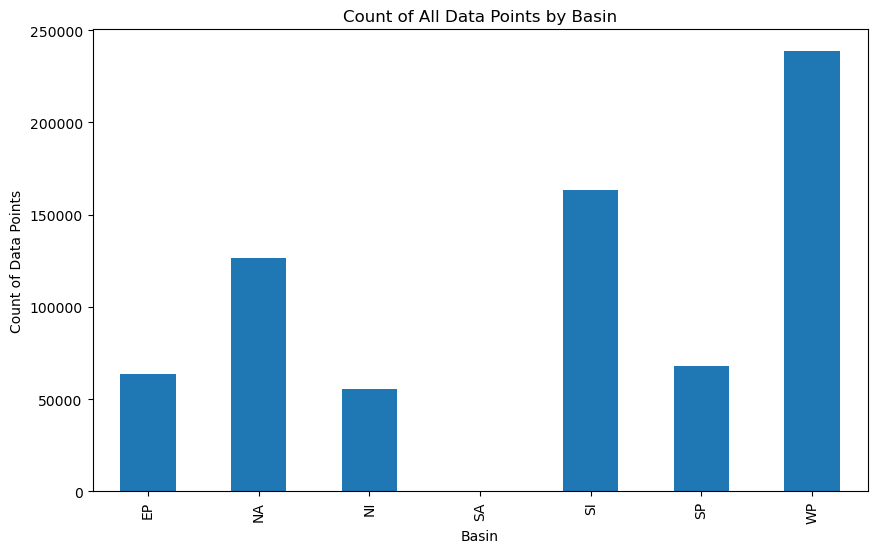

In [161]:
basin_counts = df.groupby('BASIN').SID.count()
basin_counts
plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar')
plt.title('Count of All Data Points by Basin')
plt.xlabel('Basin')
plt.ylabel('Count of Data Points')
plt.xticks(rotation=90) 
plt.show()

# 7) Plot the count of unique hurricanes by Basin

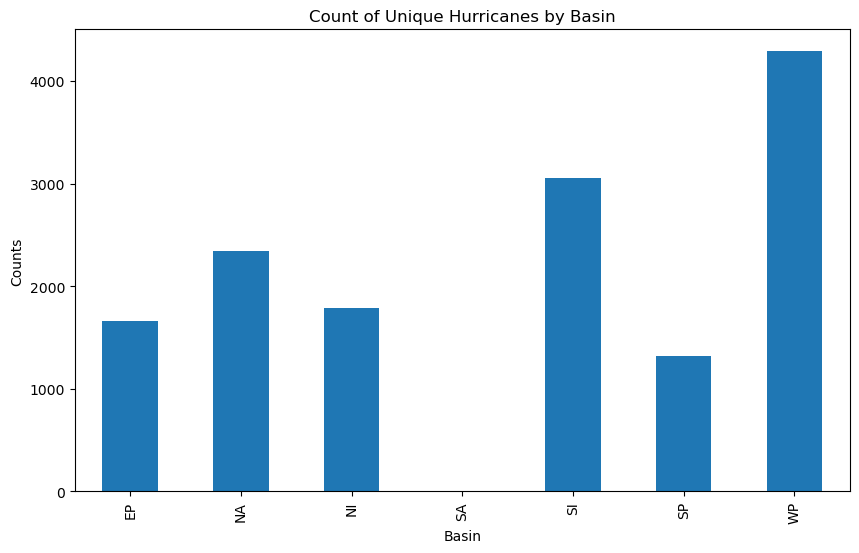

In [162]:
basin_counts_unique = df.groupby('BASIN').SID.nunique()
basin_counts_unique
plt.figure(figsize=(10, 6))
basin_counts_unique.plot(kind='bar')
plt.title('Count of Unique Hurricanes by Basin')
plt.xlabel('Basin')
plt.ylabel('Counts')
plt.xticks(rotation=90) 
plt.show()

# 8) Make a hexbin of the location of datapoints in Latitude and Longitude

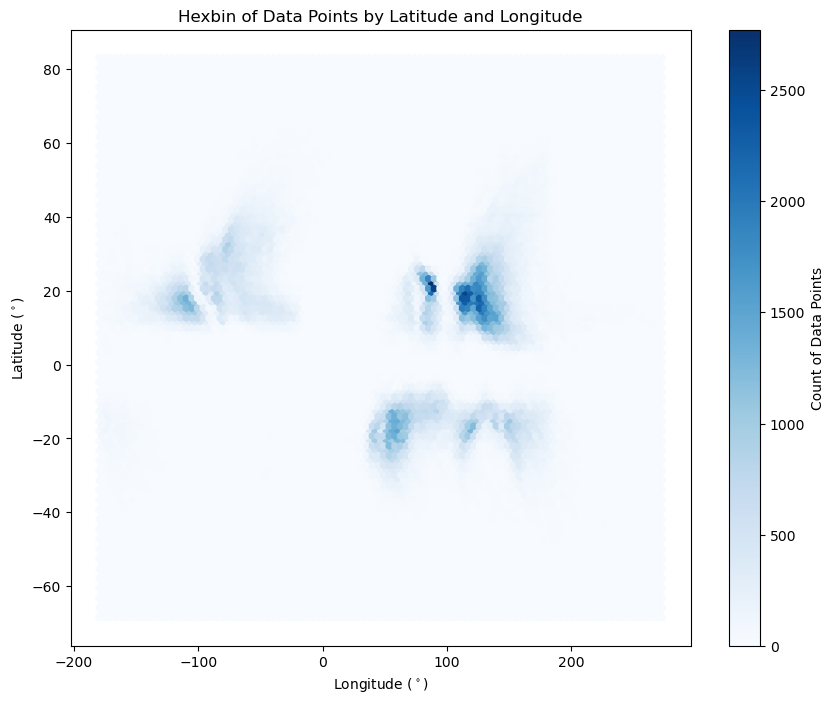

In [163]:
plt.figure(figsize=(10, 8))
plt.hexbin(df['LON'], df['LAT'], cmap='Blues')
plt.colorbar(label='Count of Data Points')
plt.title('Hexbin of Data Points by Latitude and Longitude')
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.show()

# 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

In [164]:
katrina_2005 = df[(df.NAME == 'KATRINA') & (df.ISO_TIME.dt.year == 2005)] 
katrina_sid = katrina_2005.SID.unique()[0]
print('The SID of Hurricane Katrina (from 2005) is', katrina_sid)

The SID of Hurricane Katrina (from 2005) is 2005236N23285


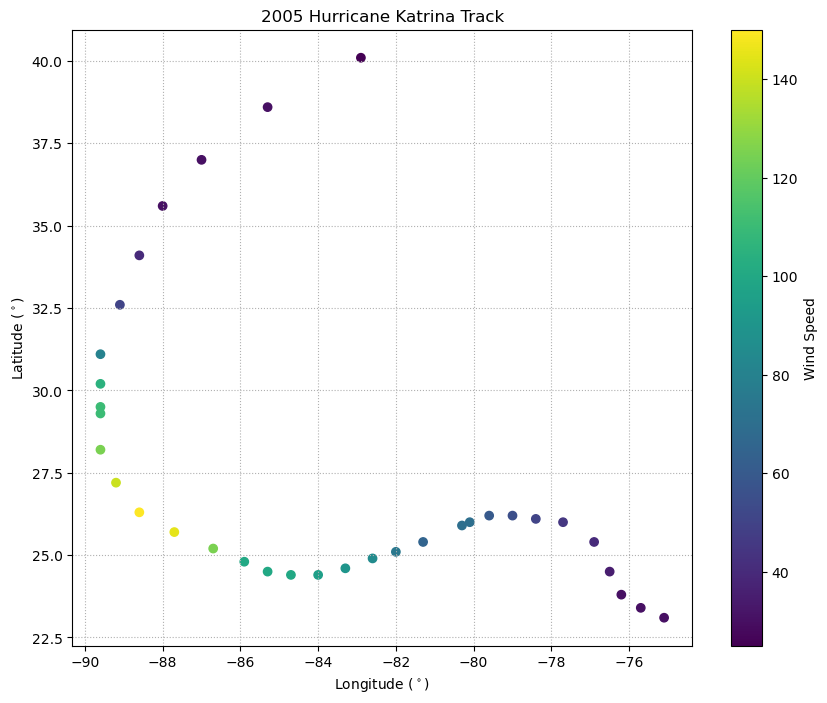

In [165]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(katrina_2005['LON'], katrina_2005['LAT'], c=katrina_2005['WIND'])
plt.colorbar(scatter, label='Wind Speed')
plt.title('2005 Hurricane Katrina Track')
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.grid(linestyle='dotted')
plt.show()

# 10) Make time the index on your dataframe

In [166]:
df = df.set_index('ISO_TIME')
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN


# 11) Plot the count of all datapoints per year as a timeseries

In [167]:
counts = df.resample('YE').size()
counts


ISO_TIME
1842-12-31      65
1843-12-31       0
1844-12-31       0
1845-12-31      25
1846-12-31       0
              ... 
2020-12-31    6407
2021-12-31    6493
2022-12-31    4439
2023-12-31    5119
2024-12-31     689
Freq: YE-DEC, Length: 183, dtype: int64

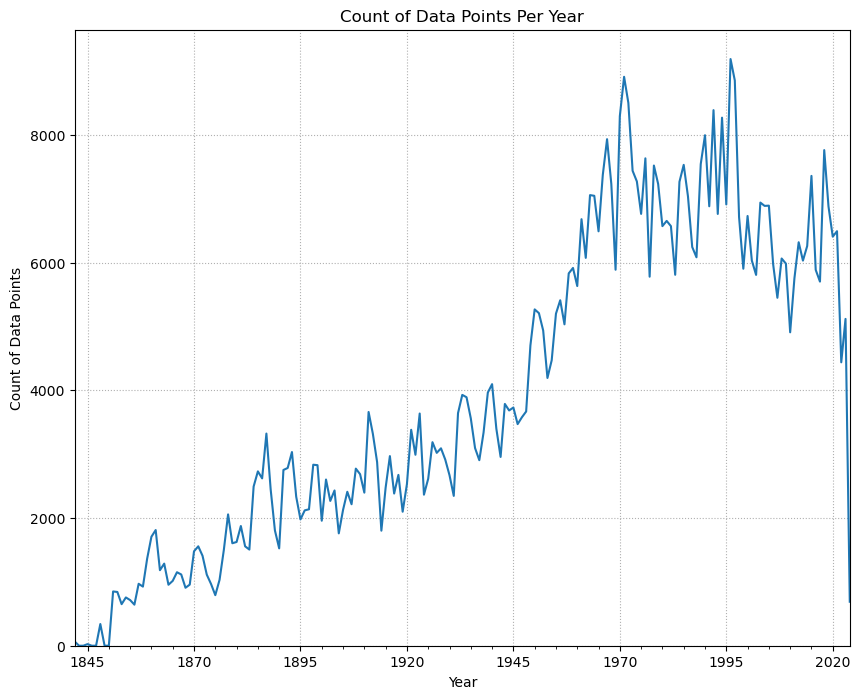

In [168]:
plt.figure(figsize=(10, 8))
counts.plot()
plt.title('Count of Data Points Per Year')
plt.xlabel('Year')
plt.ylabel('Count of Data Points')
plt.xlim(left=counts.index.min(), right=counts.index.max())
plt.ylim(bottom=0)  
plt.grid(linestyle='dotted')  
plt.show()

# 12) Plot all tracks from the North Atlantic in 2005

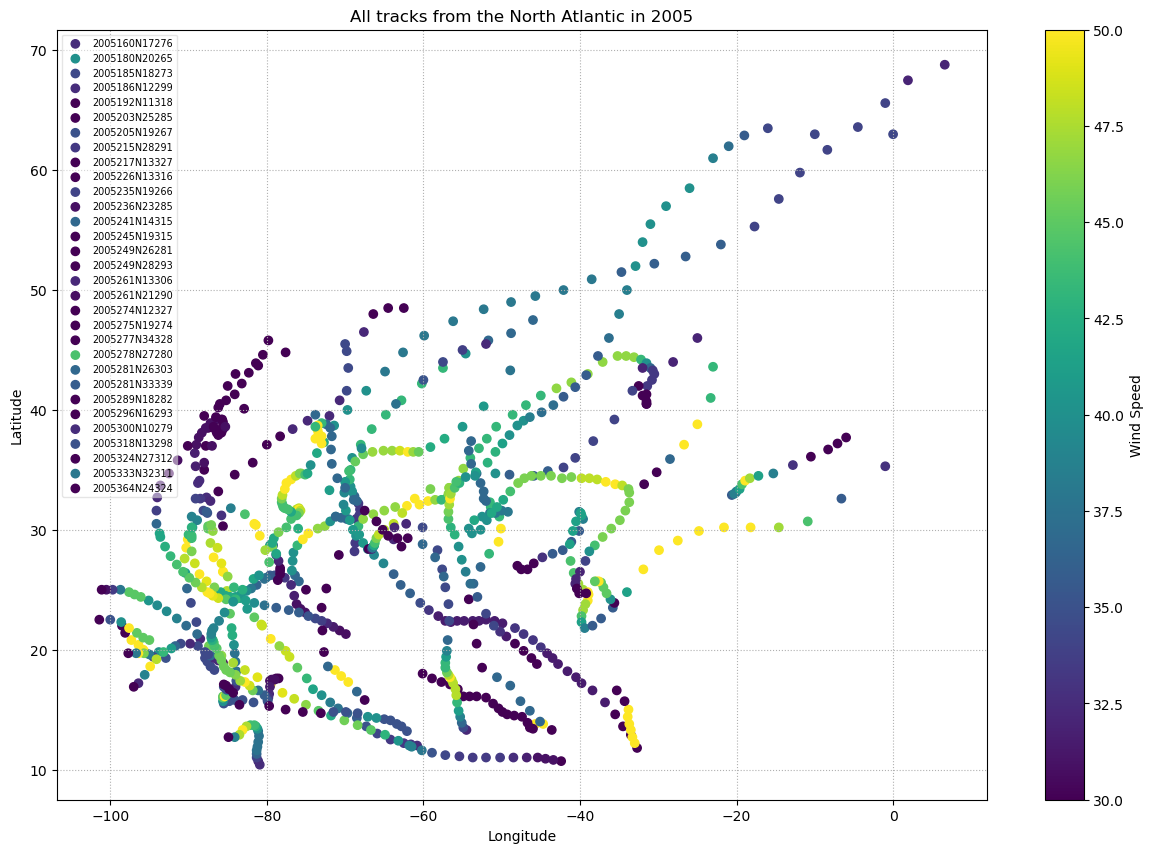

In [169]:
NA_2005 = df[(df['BASIN'] == 'NA') & (df.index.year == 2005)] 
plt.figure(figsize=(15, 10))
for sid, group in NA_2005.groupby('SID'): 
    scatter = plt.scatter(group['LON'], group['LAT'], c=group['WIND'], cmap='viridis', label=sid)

plt.legend(loc='upper left', fontsize='x-small', framealpha=0.5)
plt.colorbar(scatter, label='Wind Speed')
plt.title('All tracks from the North Atlantic in 2005')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(linestyle='dotted')
plt.show()

# 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic (“NA”) Basin

In [170]:
filtered_df = df[(df['BASIN'] == 'NA') & (df.index.year >= 1970)]
filtered_df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5000,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.6475,-79.1400,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.8000,-79.3000,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.9575,-79.4925,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1000,-79.7000,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 12:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,17.0364,-79.8000,NaN,NaN
2023-11-17 15:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,17.4991,-79.1718,NaN,NaN
2023-11-17 18:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,18.0000,-78.5000,NaN,NaN


# 14) Plot the number of datapoints per day from this filtered dataframe

In [171]:
daily_counts = filtered_df.resample('D').size()
daily_counts

ISO_TIME
1970-05-17    2
1970-05-18    8
1970-05-19    8
1970-05-20    8
1970-05-21    8
             ..
2023-11-14    2
2023-11-15    8
2023-11-16    8
2023-11-17    8
2023-11-18    1
Freq: D, Length: 19544, dtype: int64

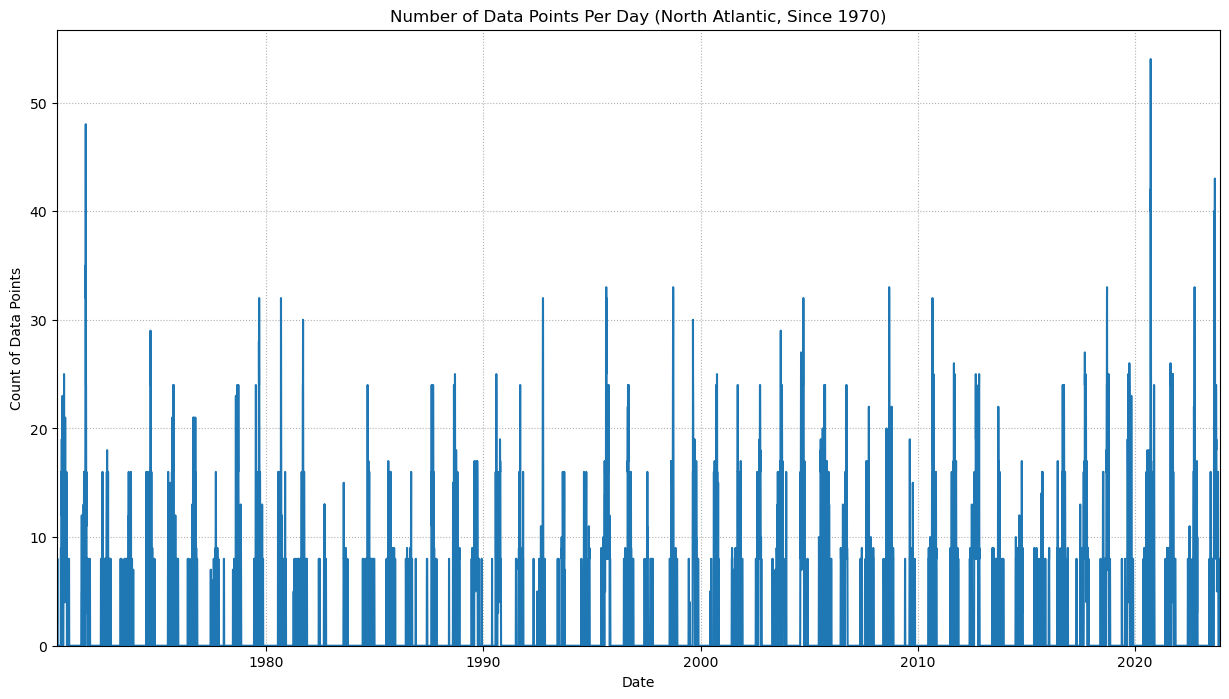

In [172]:
plt.figure(figsize=(15, 8))
plt.plot(daily_counts)
plt.title('Number of Data Points Per Day (North Atlantic, Since 1970)')
plt.xlabel('Date')
plt.ylabel('Count of Data Points')
plt.xlim(left=daily_counts.index.min(), right=daily_counts.index.max())
plt.ylim(bottom=0)
plt.grid(linestyle='dotted')
plt.show()

# 15) Calculate the climatology of datapoint counts as a function of dayofyear

In [173]:
daily_counts = filtered_df.resample('D').size()
dayofyear_counts = daily_counts.groupby(daily_counts.index.dayofyear).sum() 
dayofyear_counts

ISO_TIME
1      8
2      8
3      8
4      8
5      8
      ..
362    0
363    0
364    8
365    8
366    0
Length: 366, dtype: int64

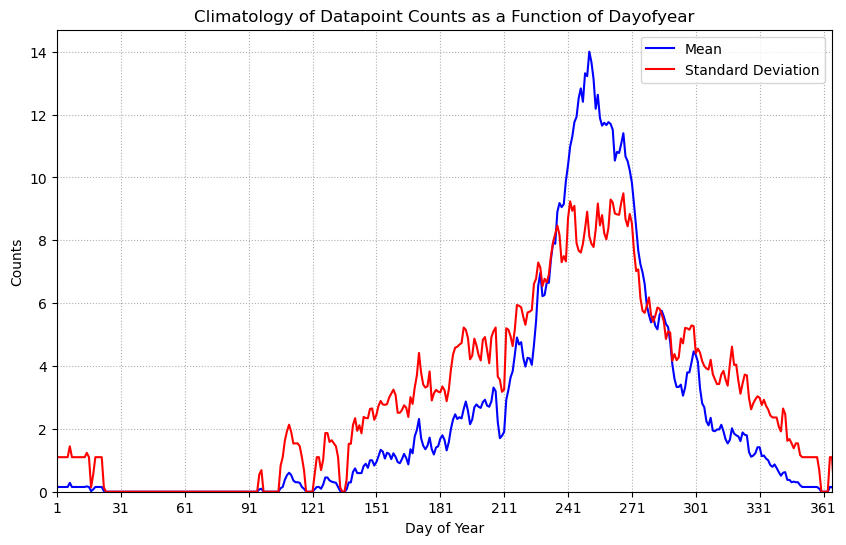

In [174]:
counts_mean = daily_counts.groupby(daily_counts.index.dayofyear).mean()
counts_std = daily_counts.groupby(daily_counts.index.dayofyear).std()

plt.figure(figsize=(10, 6))
plt.plot(counts_mean.index, counts_mean, color='b', label='Mean')
plt.plot(counts_std.index, counts_std, color='r', label='Standard Deviation')
plt.title('Climatology of Datapoint Counts as a Function of Dayofyear')
plt.xlabel('Day of Year')
plt.ylabel('Counts')
plt.xlim(left=filtered_df.index.dayofyear.min(), right=filtered_df.index.dayofyear.max())
plt.xticks(np.arange(filtered_df.index.dayofyear.min(), filtered_df.index.dayofyear.max()+1, 30))
plt.ylim(bottom=0)
plt.legend()
plt.grid(linestyle='dotted')
plt.show()

# 16) Use transform to calculate the anomaly of daily counts from the climatology

In [175]:
def anomaly(x):
    return x - x.mean()
daily_anomalies = daily_counts.groupby(daily_counts.index.dayofyear).transform(anomaly)
daily_anomalies

ISO_TIME
1970-05-17    1.925926
1970-05-18    7.703704
1970-05-19    7.703704
1970-05-20    7.370370
1970-05-21    7.259259
                ...   
2023-11-14   -0.018519
2023-11-15    6.148148
2023-11-16    6.203704
2023-11-17    6.240741
2023-11-18   -0.611111
Freq: D, Length: 19544, dtype: float64

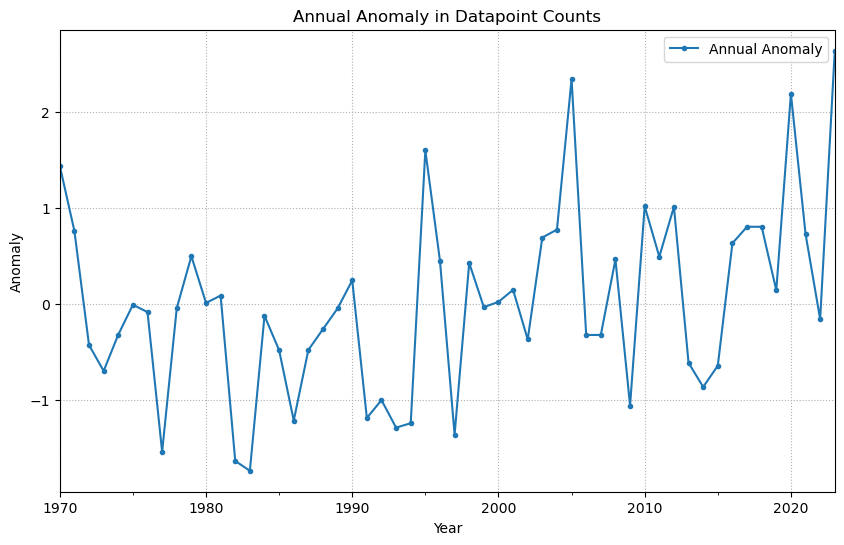

In [176]:
annual_anomalies = daily_anomalies.resample('YE').mean()

plt.figure(figsize=(10, 6))
annual_anomalies.plot(marker='.', label='Annual Anomaly')
plt.title('Annual Anomaly in Datapoint Counts')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()

In [177]:
top_3_anomalies_in_magnitude = np.abs(annual_anomalies).nlargest(3)
print(top_3_anomalies_in_magnitude)

ISO_TIME
2023-12-31    2.641863
2005-12-31    2.344794
2020-12-31    2.193579
dtype: float64


In [179]:
print('2005, 2023, 2020 stand out as having anomalies over 2')

2005, 2023, 2020 stand out as having anomalies over 2
